# Plot Earth-Relative Atmospheric Angular Momentum
#### This notebook plots daily earth-relative atmospheric angular momentum (AAM) calculated using data from the 20th Century Reanalysis Project Version 3 (see AAM_Calculation_20CR.ipynb).

#### Import the necessary libraries.

In [45]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, interactive
from datetime import datetime, timedelta

#### Read in the 1836-2015 AAM dataset using Xarray.

In [46]:
ds = xr.open_dataset('/home/scratch/20CR_v3/daily_aam_1836_2015.nc')
ds

<xarray.Dataset>
Dimensions:       (lat: 181, lon: 360, time: 65744)
Coordinates:
  * lat           (lat) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon           (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time          (time) datetime64[ns] 1836-01-01 1836-01-02 ... 2015-12-31
Data variables:
    Mr_by_latlon  (lat, lon, time) float64 ...
    Mr_by_lat     (lat, time) float64 ...
    Mr            (time) float64 ...
    Mr_stdanom    (time) float64 ...

### Plot the full time series of daily global Earth-relative AAM (1836-2015).

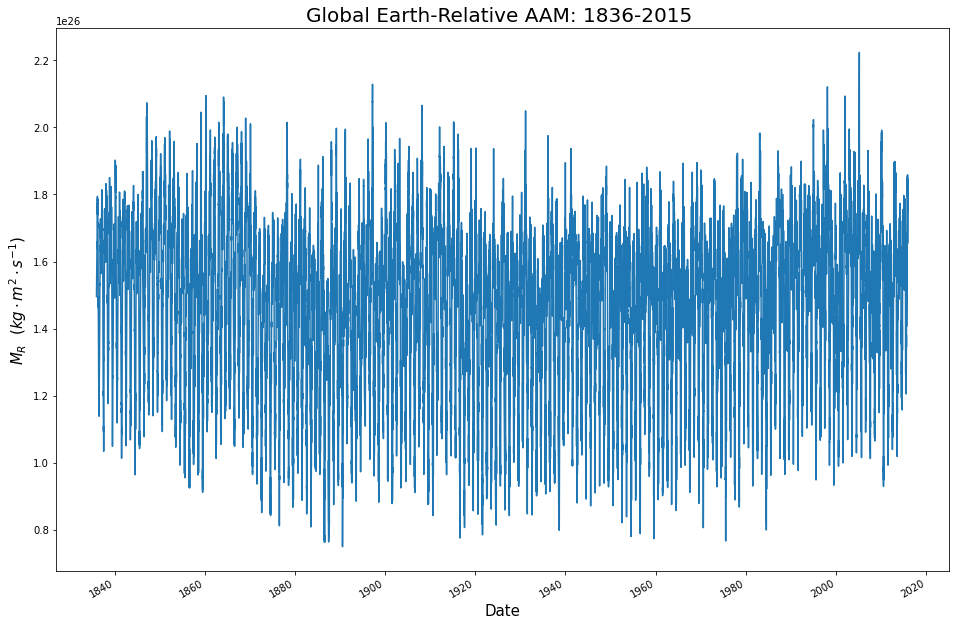

In [47]:
# Plot total AAM for the full 20CR period using the Xarray plotting function
ds.Mr.plot(figsize=(16,10))
plt.title('Global Earth-Relative AAM: 1836-2015 ', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel("$M_R$"+'  '+"$(kg \cdot m^2 \cdot s^{-1})$", fontsize=15)
plt.show()

#### Create a plot of global earth-relative AAM for a selected time period. Select desired start and end times between 01-01-1836 and 12-31-2015. 

In [48]:
start = ipywidgets.DatePicker(description = 'Start Date')
end = ipywidgets.DatePicker(description = 'End Date')

display(start, end)

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

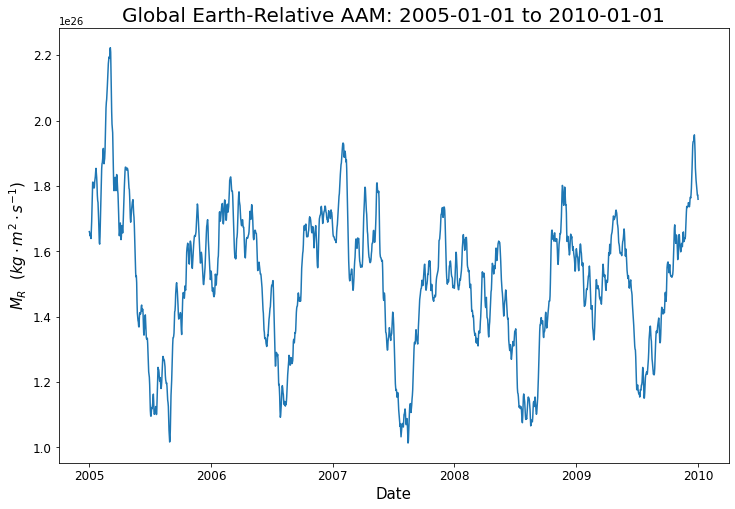

In [51]:
def Plot_Mr():
    
    # Converts start and end time to strings for file selection
    start_time = f'{start.value}T00:00:00.000000000'
    end_time = f'{end.value}T00:00:00.000000000'
    
    # Selects Mr for the desired date range
    Mr = ds.Mr.sel(time = slice(start_time, end_time))
    
    # Create an array of the selected dates in the date range
    date_generated = pd.date_range(start_time, end_time)

    # Plot daily Mr for the selected date range
    plt.figure(figsize=(12,8))
    plt.plot(date_generated, Mr)
    plt.title(f'Global Earth-Relative AAM: {start.value} to {end.value}', fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("$M_R$"+'  '+"$(kg \cdot m^2 \cdot s^{-1})$", fontsize=15)
    plt.show()
    
# Call the Plot_Mr function to create the time series of Mr
Plot_Mr()

### Plot the standardized anomalies of daily global Earth-relative AAM (1836-2015).

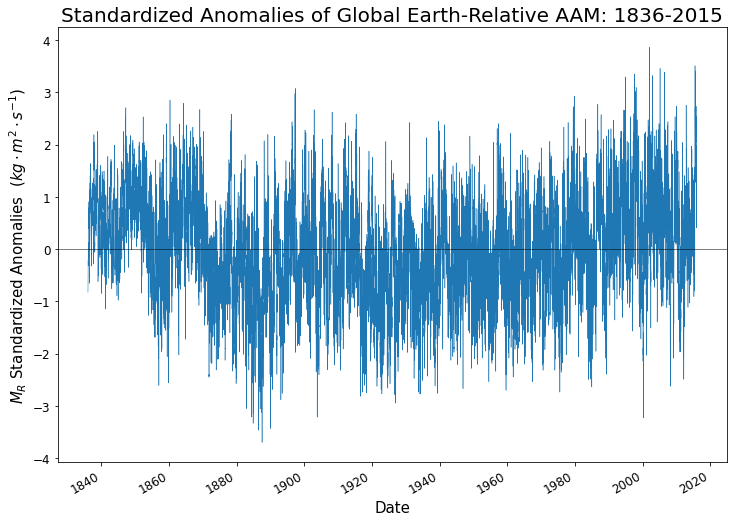

In [52]:
# Plot the standardized anomalies of global Mr for the full 20CR period
ds.Mr_stdanom.plot(figsize=(12,8), linewidth=0.5)
plt.title('Standardized Anomalies of Global Earth-Relative AAM: 1836-2015', fontsize=20)
plt.axhline(y=0.0, color='black', linestyle='-', linewidth=0.5)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel("$M_R$ Standardized Anomalies"+'  '+"$(kg \cdot m^2 \cdot s^{-1})$", fontsize=15)
plt.show()

### Plot Earth-relative AAM by latitude. 

In [53]:
# Get all the dates in the dataset
date = ds.time.values

# The plotter function plots the relative AAM by latitude (Mr_by_lat) for each day in the dataset
def Plotter(date=date):
    var = ds.sel(time=date)
    fig = plt.figure(figsize=(12, 8))
    plt.plot(var.lat, var.Mr_by_lat, linewidth=3)  # x-axis= latitude, y-axis= rel. AAM by latitude
    plt.title('Daily $M_R$ by Latitude', fontsize=20)
    plt.xlim((-90., 90.))
    plt.xticks(np.arange(-90, 100, 20))
    plt.xlabel('$\phi$', fontsize=14)
    plt.ylim(ds.Mr_by_lat.min(), ds.Mr_by_lat.max())
    plt.ylabel("$M_R$"+'  '+"$(kg \cdot m^2 \cdot s^{-1})$", fontsize=14)

#### Create an IPython Widget to make an interactive plot. Use the drop down menu to select any date from 1836 to 2015.

In [54]:
# ipywidgets interactive function enables an interactive user interface; display the widget
w = interactive(Plotter)
display(w)

interactive(children=(Dropdown(description='date', options=(numpy.datetime64('1836-01-01T00:00:00.000000000'),…